<a href="https://colab.research.google.com/github/Pankhil07/CSS_PROJECT/blob/master/Topic_modelling_CSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 17.6 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import transformers
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
import yfinance as yf
from transformers import AutoTokenizer, AutoModelForSequenceClassification

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data1 = pd.read_csv('/content/mc-onlinenews-waybackmachine-20240129073122-content.csv')
data_cp = data1.drop(['id','language','media_name','archived_url','article_url','media_url','media_name','url'],axis=1)

#data_cp = pd.read_csv('/content/out.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/content/mc-onlinenews-waybackmachine-20240129073122-content.csv'

In [ ]:
data_cp

,publish_date,title
0,2023-09-25 00:00:00,Joby’s air taxis to help US Air Force usher in...
1,2024-01-12 00:00:00,Houthi rebels vow retaliation after US and UK ...
2,2024-01-13 00:00:00,USS Carney strikes another site in Yemen
3,2023-09-27 00:00:00,Military superiority demands artificial intell...
4,2023-11-21 00:00:00,X CEO Linda Yaccarino is reportedly getting te...
...,...,...
13063,2023-10-20 00:00:00,Spectaire Could Help Global-Warming Alarmists ...
13064,2023-10-19 00:00:00,"The Hamas, Arab, and BBC Big Lie About Israel ..."
13065,2023-11-19 00:00:00,The ‘Suicidal Mania’ of American CEOs - The Am...
13066,2023-09-25 00:00:00,This Sneaky Bipartisan Bankruptcy Reform Will ...


In [ ]:
docs = list(data_cp.loc[:,"title"].values)
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True)

In [ ]:
topics,probs = topic_model.fit_transform(docs)

2024-03-14 16:37:09,793 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/409 [00:00<?, ?it/s]

2024-03-14 16:37:24,034 - BERTopic - Embedding - Completed ✓
2024-03-14 16:37:24,035 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-14 16:37:56,757 - BERTopic - Dimensionality - Completed ✓
2024-03-14 16:37:56,760 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-14 16:38:33,532 - BERTopic - Cluster - Completed ✓
2024-03-14 16:38:33,545 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-14 16:38:34,536 - BERTopic - Representation - Completed ✓


In [ ]:
freq = topic_model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4040,-1_elon_new_musk_elon musk,"[elon, new, musk, elon musk, electric, ev, tes...","[Updated Ford F-150 gets new grille, other fea..."
1,0,272,0_elon_musk_elon musk_ceo elon,"[elon, musk, elon musk, ceo elon, tesla ceo, m...",[Elon Musk demands 25% voting control of Tesla...
2,1,235,1_ai_intelligence_artificial_artificial intell...,"[ai, intelligence, artificial, artificial inte...",[Tech industry leaders endorse regulating arti...
3,2,175,2_electric_electric vehicles_electric cars_ele...,"[electric, electric vehicles, electric cars, e...",[Consumer Reports: Electric vehicles less reli...
4,3,158,3_battery_batteries_lithium_ev battery,"[battery, batteries, lithium, ev battery, ener...",[Japanese automaker Toyota and energy company ...
...,...,...,...,...,...
257,256,11,256_gerber_ross_ross gerber_investor ross,"[gerber, ross, ross gerber, investor ross, tes...",[Tesla Investor Ross Gerber Urges Americans To...
258,257,11,257_ron_investor ron_ron baron_baron,"[ron, investor ron, ron baron, baron, billiona...",[Billionaire Investor Ron Baron defends 'uncon...
259,258,11,258_stolen_car thefts_highest risk_risk auto,"[stolen, car thefts, highest risk, risk auto, ...","[Portland police break Tesla car-theft ring, h..."
260,259,10,259_biden_uaw picket_president biden_uaw,"[biden, uaw picket, president biden, uaw, pick...",[Editorial: Here’s why Joe Biden shouldn't hav...


In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_topics()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, PartOfSpeech, MaximalMarginalRelevance

main_representation_model = KeyBERTInspired()
aspect_representation_model1 = PartOfSpeech("en_core_web_sm")
aspect_representation_model2 = [KeyBERTInspired(top_n_words=30),
                                MaximalMarginalRelevance(diversity=.5)]

representation_model = {
   "Main": main_representation_model,
   "Aspect1":  aspect_representation_model1,
   "Aspect2":  aspect_representation_model2
}

vectorizer_model = CountVectorizer(min_df=5, stop_words = 'english')
topic_model = BERTopic(nr_topics = 'auto',
                      vectorizer_model = vectorizer_model,
                      representation_model = representation_model)


In [ ]:
topics, ini_probs = topic_model.fit_transform(docs)

In [ ]:
def get_topic_stats(topic_model, extra_cols = []):
    topics_info_df = topic_model.get_topic_info().sort_values('Count', ascending = False)
    topics_info_df['Share'] = 100.*topics_info_df['Count']/topics_info_df['Count'].sum()
    topics_info_df['CumulativeShare'] = 100.*topics_info_df['Count'].cumsum()/topics_info_df['Count'].sum()
    return topics_info_df[['Topic', 'Count', 'Share', 'CumulativeShare',
                           'Name', 'Representation'] + extra_cols]

get_topic_stats(topic_model, ['Aspect1', 'Aspect2']).head(10)\
    .set_index('Topic')

,Count,Share,CumulativeShare,Name,Representation,Aspect1,Aspect2
Topic,,,,,,,
0,6948,53.168044,53.168044,0_musk_musks_tesla_ceo,"[musk, musks, tesla, ceo, elon, teslas, ev, ea...","[stocks, strike, vehicle, vehicles, auto, earn...","[musks, tesla, ceo, elon, earnings, billion, a..."
-1,3873,29.637282,82.805326,-1_musk_musks_elon_tesla,"[musk, musks, elon, tesla, teslas, ceo, ev, fu...","[electric, vehicle, investors, future, data, p...","[musk, elon, teslas, ceo, earnings, says, stri..."
1,122,0.933578,83.738904,1_2023_briefing_2024_october,"[2023, briefing, 2024, october, business, toda...","[briefing, business, daily, true, stories, yea...","[2023, briefing, business, january, latest, da..."
2,117,0.895317,84.634221,2_war_crisis_bombs_fighting,"[war, crisis, bombs, fighting, aid, tensions, ...","[war, tensions, strikes, regional, case, death...","[crisis, bombs, aid, news, toll, firing, west,..."
3,115,0.880012,85.514233,3_climate_energy_2023_2024,"[climate, energy, 2023, 2024, summer, demand, ...","[climate, energy, change, use, crisis, oil, pr...","[climate, energy, 2023, demand, crisis, future..."
4,88,0.673401,86.187634,4_companies_teslas_area_cost,"[companies, teslas, area, cost, industry, east...","[companies, year, area, data, , , , , , ]","[companies, teslas, angeles, summer, homes, re..."
5,85,0.650444,86.838078,5_court_judge_federal_trial,"[court, judge, federal, trial, accused, law, c...","[court, trial, law, legal, judge, tax, federal...","[court, federal, filing, fraud, allegations, c..."
6,84,0.642792,87.480869,6_college_san_dog_deadly,"[college, san, dog, deadly, killed, kill, dieg...","[police, college, dog, man, community, county,...","[san, dog, diego, student, shot, arrest, death..."
7,73,0.558616,88.039486,7_market_trade_strategy_2023,"[market, trade, strategy, 2023, january, spy, ...","[trade, 2nd, , , , , , , , ]","[market, strategy, 2023, spy, season, global, ..."


In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.reduce_topics(docs, nr_topics=40)
topic_model.visualize_topics()

2024-01-30 18:28:54,310 - BERTopic - Topic reduction - Reducing number of topics
2024-01-30 18:28:55,301 - BERTopic - Topic reduction - Reduced number of topics from 50 to 40


In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap(n_clusters = 20)

In [ ]:
pip install gensim


In [4]:
import pandas as pd
import numpy as np
import scipy
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
pd.options.display.max_rows = 6000


import gensim
from gensim import corpora, models, matutils
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
import re
def find_abbr(text):
    abbr = []
    for i in re.finditer(r"([A-Za-z]+| )([A-Za-z]\.){2,}", text):
        abbr.append(i.group())
    df_abbr = pd.Series(abbr)
    return df_abbr.unique()

In [8]:
data_cp = pd.read_csv('/content/out.csv')

In [9]:
long_news_str = '   '.join(data_cp.news_combined)
find_abbr(long_news_str)

array([' U.S.', ' U.P.', ' A.I.', ' S.A.M.', ' S.F.', ' G.M.', ' C.E.O.',
       ' L.A.', ' E.V.', ' J.D.', ' U.K.', ' F.A.A.', ' U.A.W.', ' J.P.',
       ' a.m.', ' G.O.P.', ' U.N.', ' I.P.O.', ' N.J.', ' S.E.C.',
       ' R.J.', ' D.R.', ' F.T.C.', ' R.F.K.', ' E.U.', ' D.C.', ' S.A.',
       ' P.C.'], dtype=object)

In [10]:
# get ready stop words for the tokenization function below
nltk.download('stopwords')
mywords = ['breaking','whilst', 'say', 'says', 'today','yesterday', 'news', 'tomorrow','iii', 'ii', 'like', 'ha',]
final_stop = stopwords.words('english') + mywords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
nltk.download('punkt')
tokens = word_tokenize(long_news_str)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [13]:
def text_to_wordlist(text, remove_stop_words=True, lemma_words=True):

    ''' Clean each document into a list of words:
    1. convert abbrevations to full words
    2. tokenize the text
    3. remove non-alphabetic characters and one-letter words, including numbers and punctuations
    4. remove stop words
    '''
    # clean the text, convert only the abbrs that are meaningful
    text = re.sub(r" A.I ", " Automated Teller Machine ", text)


    text = re.sub(r" D.C. ", " District of columbia ", text)
    text = re.sub(r" E.U. ", " Europian Union ", text)

    text = re.sub(r" H.I.V. ", " Human immunodeficiency virus ", text)
    text = re.sub(r" I.H.T. ", " inheritance tax ", text)
    text = re.sub(r" I.M.F. ", " International Monetary Fund ", text)
    text = re.sub(r" I.D. ", " identification ", text)
    text = re.sub(r" L.G.B.T. ", " minority ", text)
    text = re.sub(r" M.A. ", " Massachusetts ", text)
    text = re.sub(r" N.J. ", " new jersey ", text)
    text = re.sub(r" N.K. ", " north korea ", text)
    text = re.sub(r" N.S.A. ", " National Security Agency ", text)
    text = re.sub(r" N.Y. ", " new york ", text)
    text = re.sub(r" P.E.I. ", " Prince Edward Island ", text)
    text = re.sub(r" P.M. ", " prime minister ", text)
    text = re.sub(r" P.R.C ", " china ", text)
    text = re.sub(r" S.A. ", " south africa ", text)
    text = re.sub(r" R.I. ", " Rhode Island ", text)
    text = re.sub(r" U.A.E. ", " United Arab Emirates ", text)
    text = re.sub(r" U.K. ", " england ", text)
    text = re.sub(r" U.N. ", " new jersey ", text)
    text = re.sub(r" U.S. ", " america ", text)
    text = re.sub(r" U.S.C. ", " university of south california ", text)
    text = re.sub(r" W.H.O ", " world health organization ", text)
    text = re.sub(r" a.m. ", " morning ", text)
    text = re.sub(r" p.m. ", " afternoon ", text)
    text = re.sub(r" Ph.D. ", " doctor of philosophy ", text)
    text = re.sub(r" sq.m. ", " square meter ", text)

    # Tokenize the string into word tokens
    tokens = word_tokenize(text)

    # further clean the tokens: split toekns like "b'Russia" which still have punctuations in the token
    ls = []
    for word in tokens:
        if "'" in word:
            ls = ls + word.split("'")
    tokens = tokens + ls

    # Optionally, shorten words to their stems
    if lemma_words:
        tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]

    #Remove one letter tokens & non-alphabetic tokens, such as punctuation, then lower the tokens
    tokens = [word.lower() for word in tokens if (word.isalpha() and len(word)>1)]

    # remove stop words
    if remove_stop_words:
        tokens = [word for word in tokens if word not in final_stop]

    return tokens

In [14]:
# convert each document to list of words
nltk.download('wordnet')
data_cp.news_combined = data_cp.news_combined.apply(lambda x: text_to_wordlist(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
data_cp.news_combined[0]

['safety',
 'regulator',
 'investigating',
 'steering',
 'tesla',
 'model',
 'ford',
 'restarts',
 'factory',
 'retooling',
 'increase',
 'output',
 'order',
 'america',
 'open',
 'investigation',
 'steering',
 'complaint',
 'tesla',
 'driver',
 'san',
 'francisco',
 'mayor',
 'tells',
 'elon',
 'musk',
 'one',
 'rules',
 'logo',
 'removal',
 'twitter',
 'headquarters',
 'ditching',
 'car',
 'may',
 'great',
 'planet',
 'take',
 'income',
 'try',
 'going',
 'instead',
 'going',
 'american',
 'superconductor',
 'stock',
 'sue',
 'accusing',
 'elon',
 'musk',
 'twitter',
 'fueling',
 'online',
 'hate',
 'speech',
 'campaign',
 'us',
 'regulator',
 'investigate',
 'tesla',
 'model',
 'steering',
 'issue',
 'safety',
 'hazard',
 'ford',
 'restarts',
 'electric',
 'pickup',
 'truck',
 'factory',
 'retooling',
 'increase',
 'output',
 'order',
 'tesla',
 'seeks',
 'semi',
 'charging',
 'route',
 'california',
 'texas',
 'charlie',
 'munger',
 'calls',
 'tesla',
 'miracle',
 'despite',
 'tell

In [16]:
economy_vec = wv['south']

In [17]:
economy_vec[:20] # First 20 components of 300 total

array([-0.02478027, -0.10986328,  0.06591797, -0.09130859,  0.17578125,
        0.08007812, -0.18261719, -0.34765625, -0.16113281,  0.30859375,
        0.13769531,  0.11181641,  0.12207031,  0.07128906,  0.00436401,
       -0.20898438, -0.18945312,  0.08056641,  0.03393555, -0.07910156],
      dtype=float32)

In [18]:
def doc2vec(model, wordlist):
    '''
    Use a word2vec embedding model to get the vecter of each word of the wordlist.
    Now we have a list of vecters, len(list)= number of words in the doc, len(vector)= the model type, e.g.300
    Convert each doc into a vector by np.mean. len(doc vec) = 300
    '''
    # Filter the list of vectors to include only those that Word2Vec has a vector for
    vector_list = [model[word] for word in wordlist if word in model.index_to_key]
    doc_vector = np.mean(vector_list, axis=0)
    return doc_vector

In [19]:
# convert each document (list of words) to a document vecter, then save into a list of doc_vec
x_doc = [doc2vec(wv, doc) for doc in data_cp.news_combined]
X_doc= pd.Series(x_doc, name = 'doc_vec') # list to df

In [ ]:
# top 20 numbers in the first document vector
X_doc[0][:20]

array([ 0.01712274,  0.04771775,  0.03226601,  0.01717409, -0.04225765,
       -0.03366015,  0.03501412, -0.14261658,  0.08869153,  0.06860734,
       -0.03783579, -0.06303509, -0.01663381,  0.00658848, -0.07496282,
        0.06989337, -0.0276653 ,  0.09391692,  0.01401835, -0.05459896],
      dtype=float32)

In [20]:
data_cp

,Unnamed: 0,date,news_combined,label,score,Open,High,Low,Close,Adj Close,Volume,Adj Close Next,Label
0,0,2023-08-01,"[safety, regulator, investigating, steering, t...",negative,0.908018,266.260010,266.470001,260.250000,261.070007,261.070007,83166000,254.110001,0
1,1,2023-08-02,"[shares, chinese, tesla, rival, xpeng, fall, h...",negative,0.958249,255.570007,259.519989,250.490005,254.110001,254.110001,101752900,259.320007,1
2,2,2023-08-03,"[billion, electric, vehicle, niche, flying, wa...",neutral,0.791063,252.039993,260.489990,252.000000,259.320007,259.320007,97569100,253.860001,0
3,3,2023-08-04,"[elon, musk, faces, tesla, biggest, problem, y...",negative,0.461245,260.970001,264.769989,253.110001,253.860001,253.860001,99242600,251.449997,0
4,4,2023-08-07,"[leaked, tiktok, video, reveals, details, elon...",neutral,0.930912,251.449997,253.649994,242.759995,251.449997,251.449997,111097900,249.699997,0
5,5,2023-08-08,"[brief, rivian, automotive, earnings, highligh...",neutral,0.915531,247.449997,250.919998,245.009995,249.699997,249.699997,96642200,242.190002,0
6,6,2023-08-09,"[gm, bidirectional, charging, come, standard, ...",neutral,0.656334,250.869995,251.100006,241.899994,242.190002,242.190002,101596300,245.339996,1
7,7,2023-08-10,"[general, motors, faces, issue, assembling, ba...",neutral,0.579076,245.399994,251.800003,243.000000,245.339996,245.339996,109498600,242.649994,0
8,8,2023-08-11,"[spy, takes, bath, ppi, print, wall, street, s...",neutral,0.877788,241.770004,243.789993,238.020004,242.649994,242.649994,98866600,239.759995,0
9,9,2023-08-14,"[trump, saudi, deal, cybertruck, breakdown, ap...",neutral,0.924405,235.699997,240.660004,233.750000,239.759995,239.759995,98595300,232.960007,0


In [21]:
X_doc.shape

(122,)

In [22]:
# a new dataframe containing only label, news, doc_vec
newdf = pd.concat([data_cp.Label, data_cp.news_combined,X_doc,data_cp.score,data_cp.Open,data_cp.High,data_cp.Low,data_cp.Close], axis = 1)

# convert each row in the news column from a list of tokens to a string
tokenstrlist = []
for tokenlist in  data_cp.news_combined:
    tokenstr = ' '.join(tokenlist)
    tokenstrlist.append(tokenstr)

# add the string format new as clolumn 'news_str' to the data frame
newdf['news_str'] = pd.Series(tokenstrlist)

# the final data frame is ready for modeling
newdf.head()

,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str
0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...
1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...
2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...
3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...
4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...


In [23]:
with open('label_news_docvec_newsstr.pkl', 'wb') as f:
    pickle.dump(newdf, f)

In [24]:
import pandas as pd
import numpy as np
import pickle
%matplotlib inline
pd.options.display.max_rows = 6000
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [62]:
with open('label_news_docvec_newsstr.pkl', 'rb') as r:
    df = pickle.load(r)
df.head()

,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str
0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...
1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...
2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...
3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...
4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...


In [63]:
df= df.reset_index(drop=False )


In [64]:
df

,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...
5,5,0,"[brief, rivian, automotive, earnings, highligh...","[0.021691203, 0.04107206, 0.015870383, 0.04839...",0.915531,247.449997,250.919998,245.009995,249.699997,brief rivian automotive earnings highlights re...
6,6,1,"[gm, bidirectional, charging, come, standard, ...","[0.02501006, 0.056761887, 0.009943712, 0.05198...",0.656334,250.869995,251.100006,241.899994,242.190002,gm bidirectional charging come standard across...
7,7,0,"[general, motors, faces, issue, assembling, ba...","[0.028943121, 0.040460672, 0.022312015, 0.0518...",0.579076,245.399994,251.800003,243.000000,245.339996,general motors faces issue assembling battery ...
8,8,0,"[spy, takes, bath, ppi, print, wall, street, s...","[0.029580405, 0.05133941, 0.030068792, 0.05192...",0.877788,241.770004,243.789993,238.020004,242.649994,spy takes bath ppi print wall street saying te...
9,9,0,"[trump, saudi, deal, cybertruck, breakdown, ap...","[0.0077613466, 0.053222913, 0.017712759, 0.071...",0.924405,235.699997,240.660004,233.750000,239.759995,trump saudi deal cybertruck breakdown apple wa...


In [ ]:
df.iloc[:,2]

0      [safety, regulator, investigating, steering, t...
1      [shares, chinese, tesla, rival, xpeng, fall, h...
2      [billion, electric, vehicle, niche, flying, wa...
3      [elon, musk, faces, tesla, biggest, problem, y...
4      [leaked, tiktok, video, reveals, details, elon...
5      [brief, rivian, automotive, earnings, highligh...
6      [gm, bidirectional, charging, come, standard, ...
7      [general, motors, faces, issue, assembling, ba...
8      [spy, takes, bath, ppi, print, wall, street, s...
9      [trump, saudi, deal, cybertruck, breakdown, ap...
10     [vinfast, vietnamese, ev, maker, surge, nasdaq...
11     [wall, street, weakens, higher, bond, yield, k...
12     [tesla, logged, another, ev, charging, win, te...
13     [elon, musk, aka, twitter, longer, let, block,...
14     [elon, musk, shadow, rule, looking, new, car, ...
15     [renewable, energy, job, coming, appalachia, t...
16     [tesla, risk, right, analyst, could, crash, ep...
17     [tesla, luxury, rival, m

In [ ]:
df_train = df.iloc[:95,:]

In [ ]:
df_train

,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...
5,5,0,"[brief, rivian, automotive, earnings, highligh...","[0.021691203, 0.04107206, 0.015870383, 0.04839...",0.915531,247.449997,250.919998,245.009995,249.699997,brief rivian automotive earnings highlights re...
6,6,1,"[gm, bidirectional, charging, come, standard, ...","[0.02501006, 0.056761887, 0.009943712, 0.05198...",0.656334,250.869995,251.100006,241.899994,242.190002,gm bidirectional charging come standard across...
7,7,0,"[general, motors, faces, issue, assembling, ba...","[0.028943121, 0.040460672, 0.022312015, 0.0518...",0.579076,245.399994,251.800003,243.000000,245.339996,general motors faces issue assembling battery ...
8,8,0,"[spy, takes, bath, ppi, print, wall, street, s...","[0.029580405, 0.05133941, 0.030068792, 0.05192...",0.877788,241.770004,243.789993,238.020004,242.649994,spy takes bath ppi print wall street saying te...
9,9,0,"[trump, saudi, deal, cybertruck, breakdown, ap...","[0.0077613466, 0.053222913, 0.017712759, 0.071...",0.924405,235.699997,240.660004,233.750000,239.759995,trump saudi deal cybertruck breakdown apple wa...


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
from sklearn import  svm, naive_bayes, neighbors, ensemble
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

lr_model = LogisticRegression()
#nb_model = naive_bayes.GaussianNB()
#knn_model = neighbors.KNeighborsClassifier()
#svc_model = svm.SVC(probability=True, gamma="scale")
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
#et_model = ensemble.ExtraTreesClassifier(n_estimators=100)
ada_model = ensemble.AdaBoostClassifier()
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0,
                              reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)


models = ["lr_model","rf_model","ada_model","xgb_model"]

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def baseline_model_filter(modellist, X, y):
    ''' 1. split the train data further into train and validation (17%).
        2. fit the train data into each model of the model list
        3. get the classification report based on the model performance on validation data
    '''
    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.17, random_state = 100)
    for model_name in modellist:
        curr_model = eval(model_name)
        curr_model.fit(X_train, y_train)
        report = classification_report(y_valid, curr_model.predict(X_valid))
        print(f'{model_name} \n report:{classification_report(y_valid, curr_model.predict(X_valid))}')
        cm = confusion_matrix(y_valid, curr_model.predict(X_valid))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()

In [ ]:
df

,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...
5,5,0,"[brief, rivian, automotive, earnings, highligh...","[0.021691203, 0.04107206, 0.015870383, 0.04839...",0.915531,247.449997,250.919998,245.009995,249.699997,brief rivian automotive earnings highlights re...
6,6,1,"[gm, bidirectional, charging, come, standard, ...","[0.02501006, 0.056761887, 0.009943712, 0.05198...",0.656334,250.869995,251.100006,241.899994,242.190002,gm bidirectional charging come standard across...
7,7,0,"[general, motors, faces, issue, assembling, ba...","[0.028943121, 0.040460672, 0.022312015, 0.0518...",0.579076,245.399994,251.800003,243.000000,245.339996,general motors faces issue assembling battery ...
8,8,0,"[spy, takes, bath, ppi, print, wall, street, s...","[0.029580405, 0.05133941, 0.030068792, 0.05192...",0.877788,241.770004,243.789993,238.020004,242.649994,spy takes bath ppi print wall street saying te...
9,9,0,"[trump, saudi, deal, cybertruck, breakdown, ap...","[0.0077613466, 0.053222913, 0.017712759, 0.071...",0.924405,235.699997,240.660004,233.750000,239.759995,trump saudi deal cybertruck breakdown apple wa...


In [ ]:


count_vect = CountVectorizer(analyzer='word')
#df.news_str= count_vect.fit_transform(df.news_str)
X = count_vect.fit_transform(df.news_str)
vectorized_df = pd.DataFrame(X.toarray(), columns=count_vect.get_feature_names_out())


y = torch.tensor(df.Label.values, dtype=torch.float32)

In [ ]:
df

,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...
5,5,0,"[brief, rivian, automotive, earnings, highligh...","[0.021691203, 0.04107206, 0.015870383, 0.04839...",0.915531,247.449997,250.919998,245.009995,249.699997,brief rivian automotive earnings highlights re...
6,6,1,"[gm, bidirectional, charging, come, standard, ...","[0.02501006, 0.056761887, 0.009943712, 0.05198...",0.656334,250.869995,251.100006,241.899994,242.190002,gm bidirectional charging come standard across...
7,7,0,"[general, motors, faces, issue, assembling, ba...","[0.028943121, 0.040460672, 0.022312015, 0.0518...",0.579076,245.399994,251.800003,243.000000,245.339996,general motors faces issue assembling battery ...
8,8,0,"[spy, takes, bath, ppi, print, wall, street, s...","[0.029580405, 0.05133941, 0.030068792, 0.05192...",0.877788,241.770004,243.789993,238.020004,242.649994,spy takes bath ppi print wall street saying te...
9,9,0,"[trump, saudi, deal, cybertruck, breakdown, ap...","[0.0077613466, 0.053222913, 0.017712759, 0.071...",0.924405,235.699997,240.660004,233.750000,239.759995,trump saudi deal cybertruck breakdown apple wa...


In [ ]:
print(X.shape)

(122, 12171)


In [ ]:
print(y.shape)

torch.Size([122])


lr_model 
 report:              precision    recall  f1-score   support

         0.0       0.67      0.77      0.71        13
         1.0       0.50      0.38      0.43         8

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21

rf_model 
 report:              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72        13
         1.0       0.56      0.62      0.59         8

    accuracy                           0.67        21
   macro avg       0.65      0.66      0.65        21
weighted avg       0.68      0.67      0.67        21

ada_model 
 report:              precision    recall  f1-score   support

         0.0       0.58      0.54      0.56        13
         1.0       0.33      0.38      0.35         8

    accuracy                           0.48        21
   macro avg       0.46      0.46      0.46        21
weighted avg       

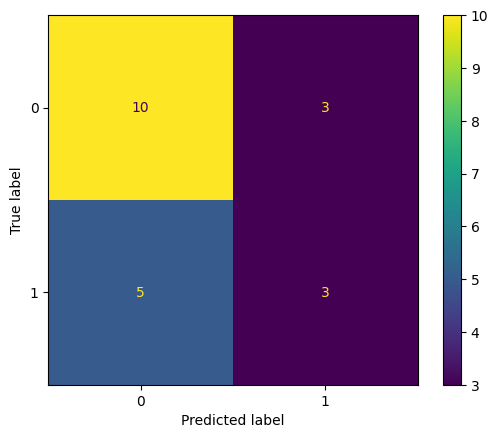

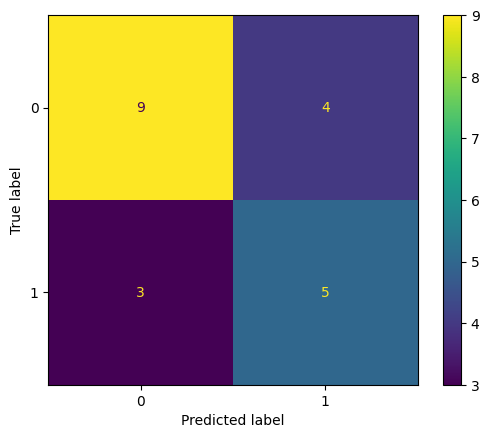

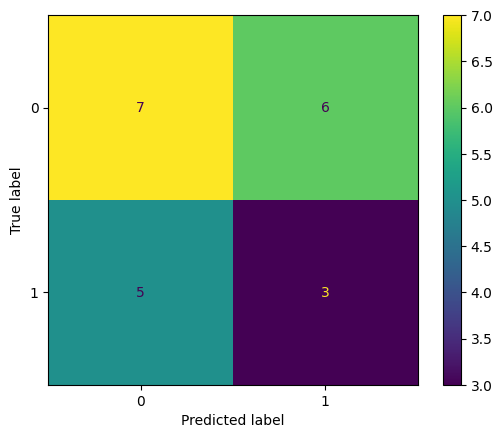

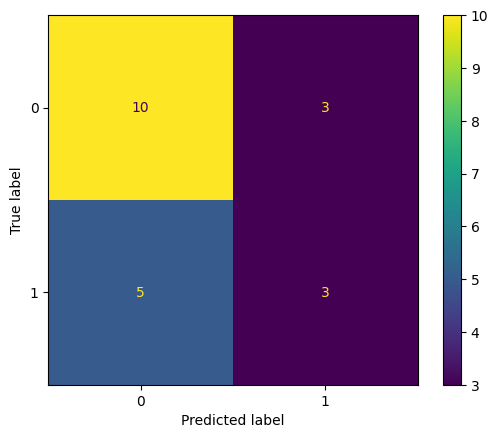

In [ ]:
baseline_model_filter(models, X, y)

In [ ]:
df_test = df.iloc[95:,:]
y_test = torch.tensor(df_test.Label.values, dtype=torch.float32)
X_test = count_vect.fit_transform(df_test.news_str)

In [40]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(df.news_str)

vectorized_df = pd.DataFrame(X_count.toarray(), columns=vectorizer.get_feature_names_out())
#y = torch.tensor(df.Label.values, dtype=torch.float32)

In [41]:
df = pd.concat([df, vectorized_df], axis=1)

In [65]:
df

,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...
5,5,0,"[brief, rivian, automotive, earnings, highligh...","[0.021691203, 0.04107206, 0.015870383, 0.04839...",0.915531,247.449997,250.919998,245.009995,249.699997,brief rivian automotive earnings highlights re...
6,6,1,"[gm, bidirectional, charging, come, standard, ...","[0.02501006, 0.056761887, 0.009943712, 0.05198...",0.656334,250.869995,251.100006,241.899994,242.190002,gm bidirectional charging come standard across...
7,7,0,"[general, motors, faces, issue, assembling, ba...","[0.028943121, 0.040460672, 0.022312015, 0.0518...",0.579076,245.399994,251.800003,243.000000,245.339996,general motors faces issue assembling battery ...
8,8,0,"[spy, takes, bath, ppi, print, wall, street, s...","[0.029580405, 0.05133941, 0.030068792, 0.05192...",0.877788,241.770004,243.789993,238.020004,242.649994,spy takes bath ppi print wall street saying te...
9,9,0,"[trump, saudi, deal, cybertruck, breakdown, ap...","[0.0077613466, 0.053222913, 0.017712759, 0.071...",0.924405,235.699997,240.660004,233.750000,239.759995,trump saudi deal cybertruck breakdown apple wa...


In [66]:
df_new = df.drop(['news_combined', 'news_str'],1)


In [67]:
df_new

,index,Label,doc_vec,score,Open,High,Low,Close
0,0,0,"[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007
1,1,1,"[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001
2,2,0,"[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007
3,3,0,"[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001
4,4,0,"[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997
5,5,0,"[0.021691203, 0.04107206, 0.015870383, 0.04839...",0.915531,247.449997,250.919998,245.009995,249.699997
6,6,1,"[0.02501006, 0.056761887, 0.009943712, 0.05198...",0.656334,250.869995,251.100006,241.899994,242.190002
7,7,0,"[0.028943121, 0.040460672, 0.022312015, 0.0518...",0.579076,245.399994,251.800003,243.000000,245.339996
8,8,0,"[0.029580405, 0.05133941, 0.030068792, 0.05192...",0.877788,241.770004,243.789993,238.020004,242.649994
9,9,0,"[0.0077613466, 0.053222913, 0.017712759, 0.071...",0.924405,235.699997,240.660004,233.750000,239.759995


In [ ]:
#df['doc_vec'] = pd.to_numeric(df['doc_vec'], errors='coerce')
#df.dtypes



KeyError: "['news_combined' 'news_str'] not found in axis"

In [68]:
#df.dtypes
df_new = df_new.drop(['doc_vec'],1)

In [69]:
X = (np.array((df_new.drop(['Label'],1))))
y =  torch.tensor(df_new.Label.values, dtype=torch.float32)

In [70]:
df_new.dtypes

index      int64
Label      int64
score    float64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
X_train = np.nan_to_num(X_train)

In [73]:
X_train

array([[ 30.        ,   0.87045634, 270.07000732, 274.98001099,
        268.1000061 , 271.29998779],
       [ 77.        ,   0.83176214, 232.        , 237.38999939,
        226.53999329, 234.30000305],
       [ 65.        ,   0.83673072, 204.03999329, 205.99000549,
        197.8500061 , 205.66000366],
       [  9.        ,   0.92440468, 235.69999695, 240.66000366,
        233.75      , 239.75999451],
       [ 33.        ,   0.76248169, 271.16000366, 271.44000244,
        263.76000977, 265.27999878],
       [ 25.        ,   0.85052073, 255.13999939, 255.38999939,
        245.05999756, 251.91999817],
       [ 70.        ,   0.74560559, 223.1499939 , 224.1499939 ,
        217.63999939, 222.11000061],
       [ 28.        ,   0.8943491 , 264.26998901, 274.8500061 ,
        260.60998535, 273.57998657],
       [120.        ,   0.93507475, 211.30000305, 215.6499939 ,
        207.75      , 209.13999939],
       [111.        ,   0.93680298, 238.11000061, 238.96000671,
        232.03999329, 234.9

In [58]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), y_train)
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), y_test)

In [ ]:
X_train

array([[ 30.        ,   0.87045634, 270.07000732, ...,   0.        ,
          0.        ,   0.        ],
       [ 77.        ,   0.83176214, 232.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 65.        ,   0.83673072, 204.03999329, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 92.        ,   0.49539337, 242.74000549, ...,   0.        ,
          0.        ,   0.        ],
       [ 51.        ,   0.72711813, 262.92001343, ...,   0.        ,
          0.        ,   0.        ],
       [102.        ,   0.91332799, 254.49000549, ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
print(X_test.shape)
print(y_test.shape)

(37, 12177)
torch.Size([37])


In [74]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [75]:
# Define the neural network model
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [86]:
input_size =12177 # X_train.shape[1]
hidden_size = 64
output_size = 1

model = TextClassifier(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1).float()
        outputs = outputs.view(-1,1).float()
        #outputs = torch.sigmoid(outputs)
        #print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluating the model
model.eval()
with torch.no_grad():
    all_preds = []
    for inputs, labels in test_loader:
        #print(inputs.shape)
        outputs = model(inputs)
        preds = (outputs > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        #all_labels.extend(labels.cpu().numpy())

print(classification_report(y_test.numpy(), all_preds))
test_accuracy = accuracy_score(y_test.numpy(), all_preds)
print(f'Test Accuracy: {test_accuracy}')

              precision    recall  f1-score   support

         0.0       0.56      0.61      0.58        23
         1.0       0.25      0.21      0.23        14

    accuracy                           0.46        37
   macro avg       0.41      0.41      0.41        37
weighted avg       0.44      0.46      0.45        37

Test Accuracy: 0.4594594594594595


In [77]:
def baseline_model_filter(modellist, X, y):
    ''' 1. split the train data further into train and validation (17%).
        2. fit the train data into each model of the model list
        3. get the classification report based on the model performance on validation data
    '''
    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.17, random_state = 100)
    for model_name in modellist:
        curr_model = eval(model_name)
        curr_model.fit(X_train, y_train)
        print(f'{model_name} \n report:{classification_report(y_valid, curr_model.predict(X_valid))}')
        cm = confusion_matrix(y_valid, curr_model.predict(X_valid))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()

In [78]:
X = np.nan_to_num(X)

lr_model 
 report:              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64        13
         1.0       0.44      0.50      0.47         8

    accuracy                           0.57        21
   macro avg       0.56      0.56      0.56        21
weighted avg       0.58      0.57      0.58        21

rf_model 
 report:              precision    recall  f1-score   support

         0.0       0.64      0.54      0.58        13
         1.0       0.40      0.50      0.44         8

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.51        21
weighted avg       0.55      0.52      0.53        21

ada_model 
 report:              precision    recall  f1-score   support

         0.0       0.73      0.62      0.67        13
         1.0       0.50      0.62      0.56         8

    accuracy                           0.62        21
   macro avg       0.61      0.62      0.61        21
weighted avg       

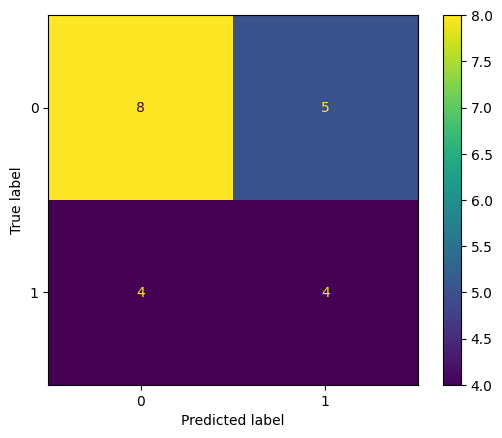

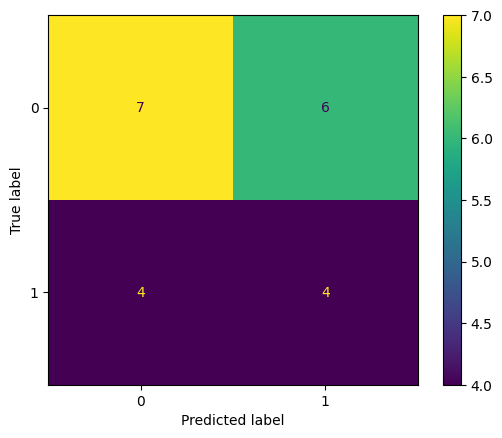

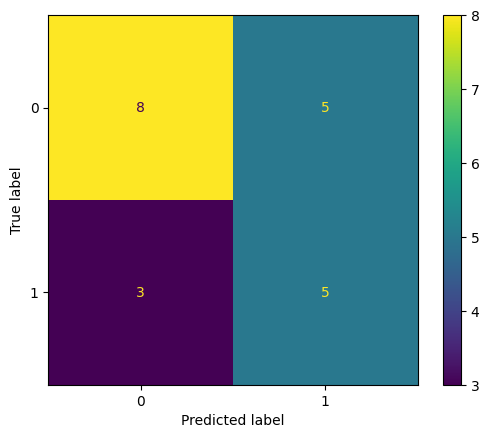

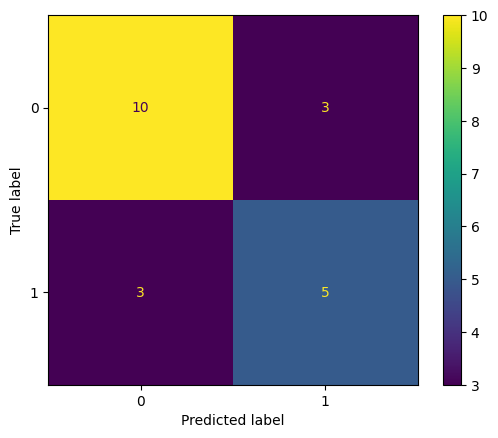

In [79]:
baseline_model_filter(models, X, y)

In [87]:
df

,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...
5,5,0,"[brief, rivian, automotive, earnings, highligh...","[0.021691203, 0.04107206, 0.015870383, 0.04839...",0.915531,247.449997,250.919998,245.009995,249.699997,brief rivian automotive earnings highlights re...
6,6,1,"[gm, bidirectional, charging, come, standard, ...","[0.02501006, 0.056761887, 0.009943712, 0.05198...",0.656334,250.869995,251.100006,241.899994,242.190002,gm bidirectional charging come standard across...
7,7,0,"[general, motors, faces, issue, assembling, ba...","[0.028943121, 0.040460672, 0.022312015, 0.0518...",0.579076,245.399994,251.800003,243.000000,245.339996,general motors faces issue assembling battery ...
8,8,0,"[spy, takes, bath, ppi, print, wall, street, s...","[0.029580405, 0.05133941, 0.030068792, 0.05192...",0.877788,241.770004,243.789993,238.020004,242.649994,spy takes bath ppi print wall street saying te...
9,9,0,"[trump, saudi, deal, cybertruck, breakdown, ap...","[0.0077613466, 0.053222913, 0.017712759, 0.071...",0.924405,235.699997,240.660004,233.750000,239.759995,trump saudi deal cybertruck breakdown apple wa...


In [88]:
tfidf_chars_vect = TfidfVectorizer(analyzer='char')
train_news = tfidf_chars_vect.fit(df.news_str)
X_train_trans = train_news.transform(df.news_str).toarray()
X_test_trans = train_news.transform(X_test).toarray()

y_train = df_train.Label

lr_model.fit(X_train_trans, y_train)


print(f'{lr_model} \n report:{classification_report(y_test, lr_model.predict(X_test_trans))}')

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
rf_model.fit(X_train_trans, y_train)


print(f'{rf_model} \n report:{classification_report(y_test, rf_model.predict(X_test_trans))}')

NameError: name 'X_train_trans' is not defined

In [ ]:
ada_model.fit(X_train_trans, y_train)


print(f'{ada_model} \n report:{classification_report(y_test, ada_model.predict(X_test_trans))}')

NameError: name 'X_train_trans' is not defined

# **Topic Modelling**

In [89]:
df_HDP_train = df.news_combined[:95]
df_LDA_train = df.news_str[:95]   # 85% of the news_str data is used to train topic model
df_LDA_test = df.news_str[95:]
print(len(df_LDA_train), len(df_LDA_test))

95 27


In [90]:
id2word_hdp = gensim.corpora.Dictionary(df_HDP_train)
id2word_hdp.filter_extremes(no_below=10, no_above=0.30)
id2word_hdp.compactify()
id2word_hdp.save('train_dict_hdp')
corpus_hdp = [id2word_hdp.doc2bow(doc) for doc in df_HDP_train]

In [91]:
from gensim.models import HdpModel
hdp = HdpModel(corpus_hdp, id2word_hdp)

In [92]:
len(hdp.print_topics())

20

In [94]:
hdp.print_topics(num_topics=40)

[(0,
  '0.006*taking + 0.005*regulator + 0.005*holdings + 0.005*longer + 0.004*scrutiny + 0.004*secret + 0.004*surging + 0.004*try + 0.004*sues + 0.004*event'),
 (1,
  '0.007*acquisition + 0.006*went + 0.006*court + 0.005*fortune + 0.005*second + 0.005*lowest + 0.005*buffett + 0.005*asked + 0.005*soar + 0.005*wealth'),
 (2,
  '0.007*fisker + 0.006*expectations + 0.006*thanks + 0.006*estate + 0.005*morgan + 0.005*aim + 0.005*experience + 0.005*talks + 0.005*kevin + 0.005*manufacturing'),
 (3,
  '0.008*bond + 0.007*enough + 0.006*possible + 0.006*many + 0.006*looking + 0.005*without + 0.005*israel + 0.005*bearish + 0.005*reveal + 0.005*research'),
 (4,
  '0.006*falls + 0.006*little + 0.005*revealed + 0.005*saying + 0.005*put + 0.005*heat + 0.005*helping + 0.004*problems + 0.004*manufacturing + 0.004*sue'),
 (5,
  '0.007*renewable + 0.005*goes + 0.005*installation + 0.005*advertising + 0.005*defense + 0.005*kia + 0.005*holdings + 0.005*attack + 0.005*son + 0.004*middle'),
 (6,
  '0.006*ra

# **LDA Model**

In [95]:
tfv = TfidfVectorizer(stop_words = final_stop, ngram_range = (1, 2), max_df = 0.95)
doc_word = tfv.fit_transform(df_LDA_train).transpose()
corpus = matutils.Sparse2Corpus(doc_word)
id2word = dict((v, k) for k, v in tfv.vocabulary_.items())

In [96]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim import corpora, models, matutils
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=5, random_state = 200 )

In [97]:
lda.print_topics()

[(0,
  '0.000*"tesla suspected" + 0.000*"suspected running" + 0.000*"virginia fatal" + 0.000*"crash involving" + 0.000*"probing virginia" + 0.000*"us probing" + 0.000*"running automated" + 0.000*"involving tesla" + 0.000*"virginia" + 0.000*"driving system"'),
 (1,
  '0.000*"word year" + 0.000*"privacy" + 0.000*"israel" + 0.000*"word" + 0.000*"privacy test" + 0.000*"carmakers" + 0.000*"carmakers failing" + 0.000*"failing privacy" + 0.000*"control data" + 0.000*"little control"'),
 (2,
  '0.000*"earnings" + 0.000*"powell" + 0.000*"netflix" + 0.000*"tesla earnings" + 0.000*"autopilot" + 0.000*"street" + 0.000*"us" + 0.000*"wall" + 0.000*"powell speech" + 0.000*"stocks"'),
 (3,
  '0.001*"uaw" + 0.001*"strike" + 0.001*"cybertruck" + 0.001*"nasdaq" + 0.001*"car" + 0.001*"ford" + 0.001*"vehicle" + 0.001*"us" + 0.000*"ai" + 0.000*"ceo"'),
 (4,
  '0.000*"cybertruck" + 0.000*"strike" + 0.000*"ai" + 0.000*"tesla cybertruck" + 0.000*"uk summit" + 0.000*"stocks" + 0.000*"tesla justice" + 0.000*"uk"

In [98]:
range(len(df_LDA_train))

range(0, 95)

In [99]:
len(corpus)

95

In [100]:

top_vecs_train = []
for i in range(len(df_LDA_train)):
    doc_topics = lda.get_document_topics(corpus[i], minimum_probability=0.0)
    doc_top_vec = [doc_topics[num][1] for num in range(20)]
    top_vecs_train.append(doc_top_vec)

print(len(top_vecs_train))
top_vecs_train[5]

95


[0.017962756,
 0.017962756,
 0.017962756,
 0.6587076,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962756,
 0.017962798,
 0.017962756,
 0.017962756]

In [101]:
# use the topic model from train data to get get data topic vectors
doc_word_test = tfv.fit_transform(df_LDA_test).transpose()
corpus_test = matutils.Sparse2Corpus(doc_word_test)

top_vecs_test = []
for i in range(len(df_LDA_test)):
    doc_topics_test = lda.get_document_topics(corpus_test[i], minimum_probability=0.0)
    doc_top_vec_test = [doc_topics_test[num][1] for num in range(20)]
    top_vecs_test.append(doc_top_vec_test)

print(len(top_vecs_test))
top_vecs_test[1]

27


[0.04999991,
 0.04999991,
 0.04999991,
 0.050001644,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991,
 0.049999915,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991,
 0.04999991]

In [102]:
# combine the two lists then convert to a Seires adding to the full dataframe for train, valid, test split.
top_vecs = pd.Series(top_vecs_train + top_vecs_test, name = 'top_vecs')

In [103]:
df['top_vecs'] = top_vecs
df.head()

,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str,top_vecs
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...,"[0.012141995, 0.012141995, 0.012141995, 0.3364..."
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...,"[0.015246533, 0.015246533, 0.015246533, 0.7103..."
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...,"[0.014426018, 0.014426018, 0.014426018, 0.7259..."
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...,"[0.019725053, 0.019725053, 0.019725053, 0.6252..."
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...,"[0.015847143, 0.015847143, 0.015847143, 0.4687..."


In [104]:
# combine the two vector columns for later modeling
df['vectors'] = pd.Series([list(df.doc_vec[row]) + list(df.top_vecs[row]) for row in range(len(df))])

print(len(df.vectors[0]))
print(len(df.vectors))
df.head()

320
122


,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str,top_vecs,vectors
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...,"[0.012141995, 0.012141995, 0.012141995, 0.3364...","[0.017122744, 0.047717754, 0.032266013, 0.0171..."
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...,"[0.015246533, 0.015246533, 0.015246533, 0.7103...","[0.021161549, 0.038253207, 0.043718416, 0.0579..."
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...,"[0.014426018, 0.014426018, 0.014426018, 0.7259...","[0.0039986363, 0.035500623, 0.028435523, 0.053..."
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...,"[0.019725053, 0.019725053, 0.019725053, 0.6252...","[0.015468597, 0.050003547, 0.025144577, 0.0337..."
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...,"[0.015847143, 0.015847143, 0.015847143, 0.4687...","[0.011035433, 0.045676287, 0.028718837, 0.0488..."


In [105]:
with open('df_final_6col.pkl', 'wb') as f:
    pickle.dump(df, f)

In [106]:
with open('df_final_6col.pkl', 'rb') as f:
    df = pickle.load(f)

In [107]:
from sklearn import  svm, naive_bayes, neighbors, ensemble
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import f1_score, classification_report, accuracy_score

lr_model = LogisticRegression()
#nb_model = naive_bayes.GaussianNB()
#knn_model = neighbors.KNeighborsClassifier()
#svc_model = svm.SVC(probability=True, gamma="scale")
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
#et_model = ensemble.ExtraTreesClassifier(n_estimators=100)
ada_model = ensemble.AdaBoostClassifier()
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0,
                              reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)

models = ["lr_model",  "rf_model",  "ada_model", "xgb_model"]

In [108]:
def baseline_model_filter(modellist, X, y):
    ''' 1. split the train data further into train and validation (17%).
        2. fit the train data into each model of the model list
        3. get the classification report based on the model performance on validation data
    '''
    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.17, random_state = 100)
    for model_name in modellist:
        curr_model = eval(model_name)
        curr_model.fit(X_train, y_train)
        print(f'{model_name} \n report:{classification_report(y_valid, curr_model.predict(X_valid))}')
        cm = confusion_matrix(y_valid, curr_model.predict(X_valid))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()

In [109]:
df

,index,Label,news_combined,doc_vec,score,Open,High,Low,Close,news_str,top_vecs,vectors
0,0,0,"[safety, regulator, investigating, steering, t...","[0.017122744, 0.047717754, 0.032266013, 0.0171...",0.908018,266.260010,266.470001,260.250000,261.070007,safety regulator investigating steering tesla ...,"[0.012141995, 0.012141995, 0.012141995, 0.3364...","[0.017122744, 0.047717754, 0.032266013, 0.0171..."
1,1,1,"[shares, chinese, tesla, rival, xpeng, fall, h...","[0.021161549, 0.038253207, 0.043718416, 0.0579...",0.958249,255.570007,259.519989,250.490005,254.110001,shares chinese tesla rival xpeng fall head aut...,"[0.015246533, 0.015246533, 0.015246533, 0.7103...","[0.021161549, 0.038253207, 0.043718416, 0.0579..."
2,2,0,"[billion, electric, vehicle, niche, flying, wa...","[0.0039986363, 0.035500623, 0.028435523, 0.053...",0.791063,252.039993,260.489990,252.000000,259.320007,billion electric vehicle niche flying wall str...,"[0.014426018, 0.014426018, 0.014426018, 0.7259...","[0.0039986363, 0.035500623, 0.028435523, 0.053..."
3,3,0,"[elon, musk, faces, tesla, biggest, problem, y...","[0.015468597, 0.050003547, 0.025144577, 0.0337...",0.461245,260.970001,264.769989,253.110001,253.860001,elon musk faces tesla biggest problem yet elon...,"[0.019725053, 0.019725053, 0.019725053, 0.6252...","[0.015468597, 0.050003547, 0.025144577, 0.0337..."
4,4,0,"[leaked, tiktok, video, reveals, details, elon...","[0.011035433, 0.045676287, 0.028718837, 0.0488...",0.930912,251.449997,253.649994,242.759995,251.449997,leaked tiktok video reveals details elon musk ...,"[0.015847143, 0.015847143, 0.015847143, 0.4687...","[0.011035433, 0.045676287, 0.028718837, 0.0488..."
5,5,0,"[brief, rivian, automotive, earnings, highligh...","[0.021691203, 0.04107206, 0.015870383, 0.04839...",0.915531,247.449997,250.919998,245.009995,249.699997,brief rivian automotive earnings highlights re...,"[0.017962756, 0.017962756, 0.017962756, 0.6587...","[0.021691203, 0.04107206, 0.015870383, 0.04839..."
6,6,1,"[gm, bidirectional, charging, come, standard, ...","[0.02501006, 0.056761887, 0.009943712, 0.05198...",0.656334,250.869995,251.100006,241.899994,242.190002,gm bidirectional charging come standard across...,"[0.02024105, 0.02024105, 0.02024105, 0.6154201...","[0.02501006, 0.056761887, 0.009943712, 0.05198..."
7,7,0,"[general, motors, faces, issue, assembling, ba...","[0.028943121, 0.040460672, 0.022312015, 0.0518...",0.579076,245.399994,251.800003,243.000000,245.339996,general motors faces issue assembling battery ...,"[0.47730783, 0.013292626, 0.013292626, 0.28342...","[0.028943121, 0.040460672, 0.022312015, 0.0518..."
8,8,0,"[spy, takes, bath, ppi, print, wall, street, s...","[0.029580405, 0.05133941, 0.030068792, 0.05192...",0.877788,241.770004,243.789993,238.020004,242.649994,spy takes bath ppi print wall street saying te...,"[0.023296382, 0.023296382, 0.023296382, 0.5573...","[0.029580405, 0.05133941, 0.030068792, 0.05192..."
9,9,0,"[trump, saudi, deal, cybertruck, breakdown, ap...","[0.0077613466, 0.053222913, 0.017712759, 0.071...",0.924405,235.699997,240.660004,233.750000,239.759995,trump saudi deal cybertruck breakdown apple wa...,"[0.017653836, 0.017653836, 0.017653836, 0.6645...","[0.0077613466, 0.053222913, 0.017712759, 0.071..."


In [110]:
df_new_1 = df.drop(['news_combined', 'news_str'],1)


In [120]:
X = (np.array((df_new_1.drop(['Label'],1))))
y =  torch.tensor(df_new_1.Label.values, dtype=torch.float32)

In [111]:
#vectorizer = CountVectorizer()
#X_count = np.array(list(df_new_1.top_vecs))
#y = torch.tensor(df_new_1.Label.values, dtype=torch.float32)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

In [122]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), y_train)
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), y_test)

In [123]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [124]:
# Define the neural network model
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [125]:
input_size = X_train.shape[1]
hidden_size = 128
output_size = 1

model = TextClassifier(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        outputs = outputs.view(-1,1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluating the model
model.eval()
with torch.no_grad():
    all_preds = []
    for inputs, labels in test_loader:
        #print(inputs.shape)
        outputs = model(inputs)
        preds = (outputs > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        #all_labels.extend(labels.cpu().numpy())

print(classification_report(y_test.numpy(), all_preds))
test_accuracy = accuracy_score(y_test.numpy(), all_preds)
print(f'Test Accuracy: {test_accuracy}')

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        15
         1.0       0.00      0.00      0.00        10

    accuracy                           0.60        25
   macro avg       0.30      0.50      0.37        25
weighted avg       0.36      0.60      0.45        25

Test Accuracy: 0.6


lr_model 
 report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.41      1.00      0.58         7

    accuracy                           0.41        17
   macro avg       0.21      0.50      0.29        17
weighted avg       0.17      0.41      0.24        17

rf_model 
 report:              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.54      1.00      0.70         7

    accuracy                           0.65        17
   macro avg       0.77      0.70      0.64        17
weighted avg       0.81      0.65      0.62        17

ada_model 
 report:              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.45      0.71      0.56         7

    accuracy                           0.53        17
   macro avg       0.56      0.56      0.53        17
weighted avg       

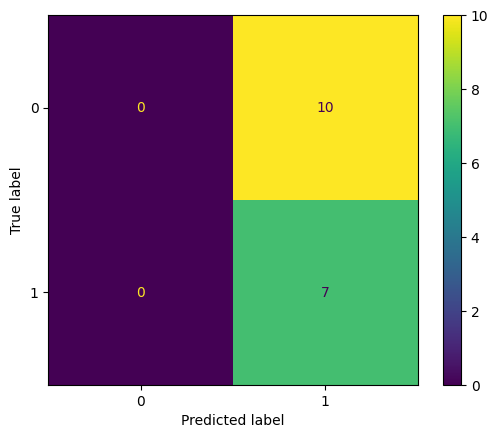

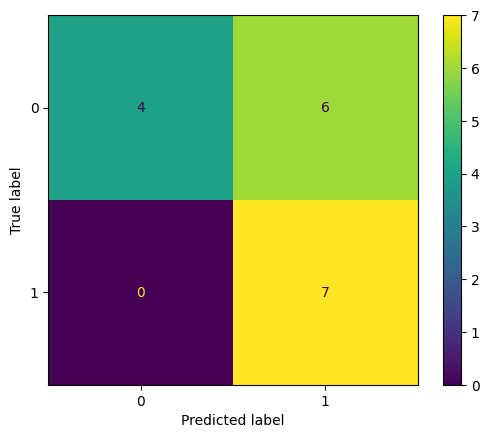

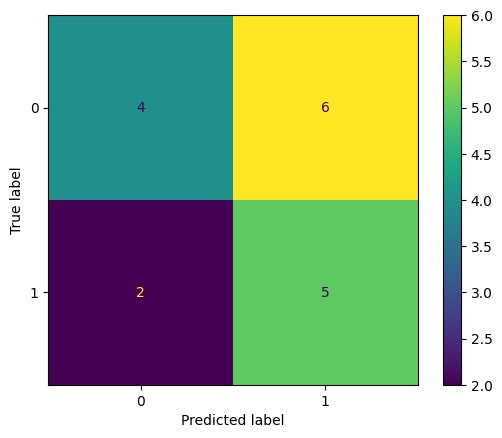

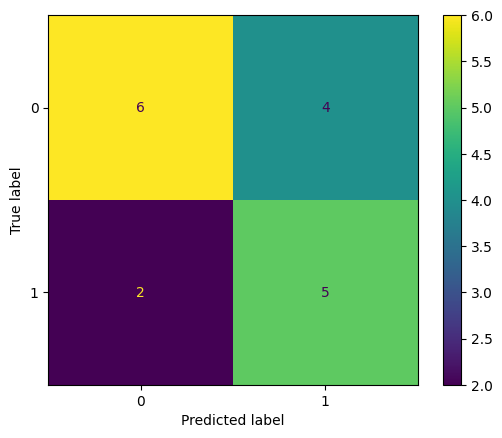

In [126]:
#doc2vec+topic vectors
X = np.array(list(df.vectors[:95]))
y = np.array(list(df.Label[:95]))

baseline_model_filter(models, X, y)

lr_model 
 report:              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.33      0.12      0.18         8

    accuracy                           0.57        21
   macro avg       0.47      0.49      0.45        21
weighted avg       0.51      0.57      0.51        21

rf_model 
 report:              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.29      0.25      0.27         8

    accuracy                           0.48        21
   macro avg       0.43      0.43      0.43        21
weighted avg       0.46      0.48      0.47        21

ada_model 
 report:              precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       0.17      0.12      0.14         8

    accuracy                           0.43        21
   macro avg       0.35      0.37      0.36        21
weighted avg       

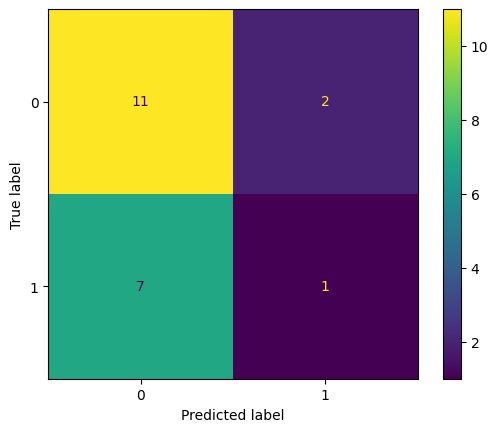

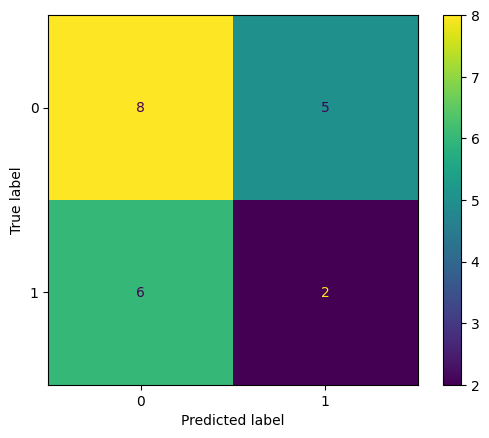

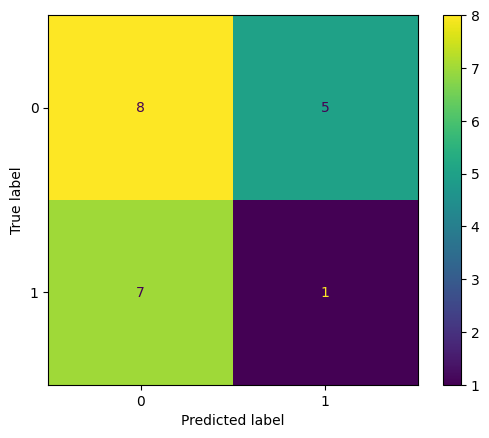

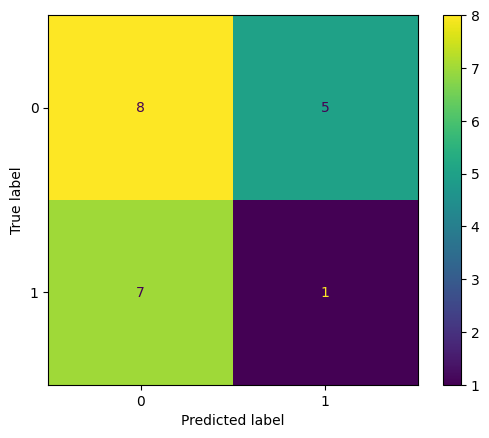

In [127]:
#topic vectors only
X = np.array(list(df.top_vecs[:1688]))
y = np.array(list(df.Label[:1688]))

baseline_model_filter(models, X, y)